# Domain and Data Information


## Stakeholder Information

Stakeholder is one of the fastest growing startups in the logistics and delivery domain. They work with several partners and make on-demand delivery to their customers. During the COVID-19 pandemic, they are facing several different challenges and everyday they are trying to address these challenges.

Stakeholder strives to make their customers happy. As a growing startup, with a global expansion strategy they know that they need to make their customers happy and the only way to do that is to measure how happy each customer is. If they can predict what makes their customers happy or unhappy, they can then take necessary actions.

Getting feedback from customers is not easy either, but they do their best to get constant feedback from their customers. This is a crucial function to improve their operations across all levels.

The Stakeholder recently did a survey to a select customer cohort. We are presented with a subset of this data. They will be using the **remaining data** as a **private test set**. 

## Data Description

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers

X1 = My order was delivered on time

X2 = Contents of my order was as I expected

X3 = I ordered everything I wanted to order

X4 = I paid a good price for my order

X5 = I am satisfied with my courier

X6 = The app makes ordering easy for me

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

## Goals 

* Predict if a customer is happy or not based on the answers they give to questions asked

* Using a feature selection approach show stakeholder what the minimal set of attributes/features necessary that would preserve the most information about the problem while increasing predictability of the data.

## Metrics 

Reach 73% accuracy score or above, or convince us why your solution is superior. We are definitely interested in every solution and insight you can provide us.

# Obtain Data


In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
path = 'C:/Users/User/dsc-data-science-env-setup-v2-1/dsbc/Projects/csv/'\
            'Customer Happiness/ACME-HappinessSurvey2020.csv'
df = pd.read_csv(path)
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [3]:
# Checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [4]:
# Checking for placeholder values
for col in df.columns:
    values = df[col].unique()
    print(f'{col} unique values: {values}')

Y unique values: [0 1]
X1 unique values: [3 5 4 1]
X2 unique values: [3 2 4 5 1]
X3 unique values: [3 2 4 5 1]
X4 unique values: [4 5 3 2 1]
X5 unique values: [2 4 3 5 1]
X6 unique values: [4 3 5 2 1]


There are no missing values or placeholder values

## Checking Class Balance

Checking for class imbalance in the target variable

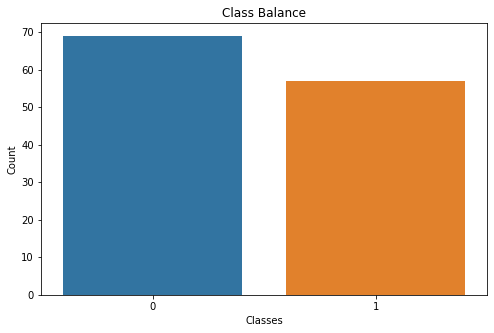

In [5]:
fig = plt.figure(figsize=(8,5))
sns.barplot(x=df['Y'].unique(), y=df['Y'].value_counts())
plt.title('Class Balance')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show();

Slight class imbalance, but not enough to require re-sampling or removing data from the "Unhappy" class.

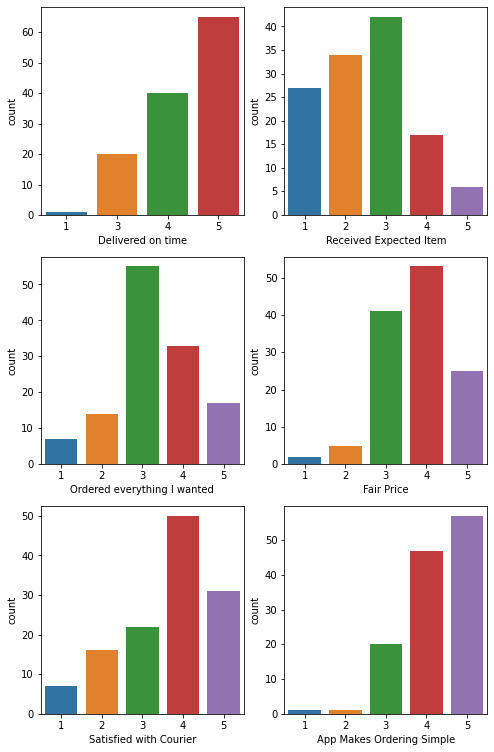

In [6]:
# Checking Normality of the data
xlabel = 'Survey Score'
ylabel = 'Count'

x1 = 'Delivered on time'
x2 = 'Received Expected Item' 
x3 = 'Ordered everything I wanted'
x4 = 'Fair Price'
x5 = 'Satisfied with Courier'
x6 = 'App Makes Ordering Simple'

fig = plt.figure(figsize=(8, 13))
plt.xlabel(xlabel)
plt.ylabel(ylabel)

ax1 = plt.subplot(3, 2, 1, )
sns.countplot(df.X1)
plt.xlabel(x1)

ax2 = plt.subplot(3, 2, 2)
sns.countplot(df.X2)
plt.xlabel(x2)

ax3 = plt.subplot(3, 2, 3)
sns.countplot(df.X3)
plt.xlabel(x3)

ax4 = plt.subplot(3, 2, 4)
sns.countplot(df.X4)
plt.xlabel(x4)

ax5 = plt.subplot(3, 2, 5)
sns.countplot(df.X5)
plt.xlabel(x5)

ax6 = plt.subplot(3, 2, 6)
sns.countplot(df.X6)
plt.xlabel(x6)

plt.show;

Observations: 
* Delivery time: Customers find the delivery time exceptional
* Correct items: There have been problems with receiving the correct items.
* Everything Ordered was everything they wanted: Customers are mostly neutral about the stakeholder's items available for ordering.  This question doesn't seem to be a Key Performance Indicator since the stakeholder's responsibilities are logistics and delivery of their clients' items.  The items available in the inventory of their clients doesn't particularly fall to them. 
* Fair Price: Customers find the prices to be favorable
* Satisfied with Courier: Customers like the courier
* Satisfied with App: Customers love the app

In [7]:
# Average responses to questions
x1 = 'My order was delivered on time'
x2 = 'Contents of my order was as I expected'
x3 = 'I ordered everything I wanted to order'
x4 = 'I paid a good price for my order'
x5 = 'I am satisfied with my courier'
x6 = 'The app makes ordering easy for me'


feats = df.drop('Y', axis=1)
question = [x1, x2,x3, x4, x5, x6]

mean = []
survey_mean_dict = {}
for col in feats.columns:
    mean.append(round(feats[col].mean(), 2))

for i in range(len(mean)):
    key = question[i]
    val = mean[i]
    survey_mean_dict[key] = val

for i in range(len(list(survey_mean_dict))):
    question = list(survey_mean_dict.keys())[i]
    mean = []
    for k in survey_mean_dict:
        mean.append(survey_mean_dict[k])
    print(f'"{question}" Average rating = {mean[i]}')

"My order was delivered on time" Average rating = 4.33
"Contents of my order was as I expected" Average rating = 2.53
"I ordered everything I wanted to order" Average rating = 3.31
"I paid a good price for my order" Average rating = 3.75
"I am satisfied with my courier" Average rating = 3.65
"The app makes ordering easy for me" Average rating = 4.25


# Linear Regression


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from scipy.stats import stats
import statsmodels.stats.api as sms

In [9]:
target = 'Y'
feat_cols = df.drop('Y', axis=1).columns
preds = '+'.join(feat_cols)

formula = target + '~' + preds
model = smf.ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     2.136
Date:                Fri, 05 Mar 2021   Prob (F-statistic):             0.0541
Time:                        16:35:51   Log-Likelihood:                -84.432
No. Observations:                 126   AIC:                             182.9
Df Residuals:                     119   BIC:                             202.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3008      0.325     -0.926      0.356      -0.944       0.342
X1             0.1292      0.065      1.992      0.049       0.001       0.258
X2            -0.0219      0.040     -0.545      0.587      -0.101       0.058
X3             0.0279      0.048      0.582      0.562      -0.067       0.123
X4            -0.0023      0.054     -0.043      0.966      -0.110       0.105
X5             0.0464      0.045      1.027      0.307      -0.043       0.136
X6             0.0213      0.061      0.349      0.728      -0.100       0.142
==============================================================================
Omnibus:                     2428.529   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.231
Skew:                          -0.174   Prob(JB):                     0.000812
Kurtosis:                       1.391   Cond. No.                         69.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Removing Statistically Insignificant columns
target = 'Y'
pred = 'X1'

formula = target + '~' + pred
model2 = smf.ols(formula=formula, data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     10.56
Date:                Fri, 05 Mar 2021   Prob (F-statistic):            0.00149
Time:                        16:41:56   Log-Likelihood:                -85.726
No. Observations:                 126   AIC:                             175.5
Df Residuals:                     124   BIC:                             181.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2107      0.237     -0.888      0.376      -0.680       0.259
X1             0.1750      0.054      3.250      0.001       0.068       0.282
==============================================================================
Omnibus:                     1697.382   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.193
Skew:                          -0.192   Prob(JB):                     0.000502
Kurtosis:                       1.343   Cond. No.                         25.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
linreg = LinearRegression()

# performing train_test_split
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(feats, y, test_size=0.2,
                                                   random_state=42)
# Fitting 
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

# Caluclating Root Mean Squared Error
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)

Train Mean Squarred Error: 0.21344520851152843
Test Mean Squarred Error: 0.30398256325114703
Train RMSE: 0.4620013079110582
Test RMSE: 0.5513461374228961


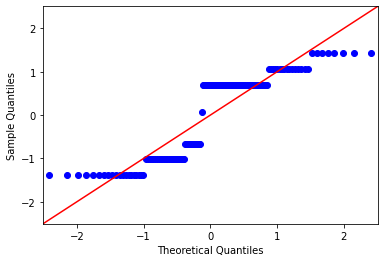

In [15]:
# Checking distribution  of errors using QQ-plot
fig = sm.graphics.qqplot(model2.resid, dist='norm', line='45', fit=True)

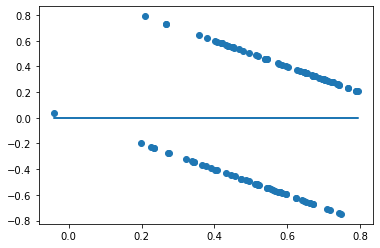

In [18]:
# Checking for homoscedasticity 

X = df.drop('Y', axis=1)

plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])